# Marks Predictor
------

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('C:/Users/hp/Desktop/marks/marks.csv')

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.shape

(200, 2)

In [6]:
df.columns

Index(['study_hours', 'student_marks'], dtype='object')

#### Visualizing the data to gain insights

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
study_hours,195.0,6.995949,1.25306,5.01,5.775,7.12,8.085,8.99
student_marks,200.0,77.933750,4.92570,68.57,73.385,77.71,82.320,86.99


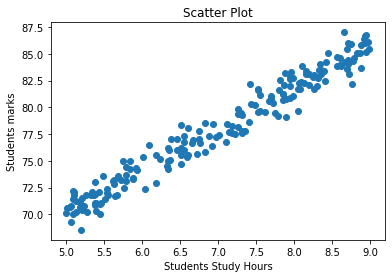

In [9]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot")
plt.show()

###### Note : Positive Correlation

In [10]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

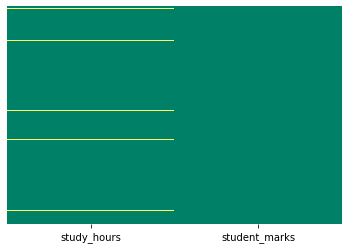

In [11]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False ,cmap='summer')

In [12]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [13]:
df2 = df.fillna(df.mean())

In [14]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [15]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [16]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=50)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


# Select a model and train it

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lr.coef_

array([[3.87438993]])

In [21]:
lr.intercept_

array([50.79389467])

In [22]:
m = 3.93
c = 50.44
y  = m * 4 + c 
y

66.16

In [23]:
lr.predict([[4]])[0][0].round(2)

66.29

In [24]:
y_pred  = lr.predict(X_test)
y_pred

array([[77.60467298],
       [71.63811249],
       [80.82041662],
       [79.50312405],
       [82.215197  ],
       [79.54186795],
       [83.14505058],
       [70.90197841],
       [81.32408731],
       [71.444393  ],
       [81.55655071],
       [85.43094064],
       [82.75761159],
       [80.62669713],
       [81.63403851],
       [82.0602214 ],
       [77.02351449],
       [73.45907576],
       [84.53983096],
       [81.24659952],
       [84.84978215],
       [76.5973316 ],
       [71.90931979],
       [71.67685639],
       [70.70825891],
       [74.07897815],
       [72.95540507],
       [84.57857485],
       [70.9407223 ],
       [70.43705161],
       [80.31674593],
       [74.73762444],
       [74.19520985],
       [82.0989653 ],
       [85.00475775],
       [85.54717234],
       [80.70418493],
       [84.73355045],
       [84.69480655],
       [83.10630668]])

In [25]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,6.92,76.38,77.604673
1,5.38,71.94,71.638112
2,7.75,79.50,80.820417
3,7.41,78.61,79.503124
4,8.11,83.82,82.215197
5,7.42,82.18,79.541868
6,8.35,83.50,83.145051
7,5.19,70.66,70.901978
8,7.88,83.23,81.324087
9,5.33,71.85,71.444393


## Fine-tune your model

In [26]:
lr.score(X_test,y_test)

0.9500395113628669

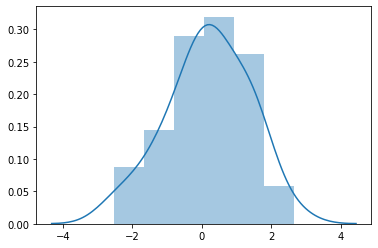

In [27]:
sns.distplot(y_test-y_pred)
plt.show()

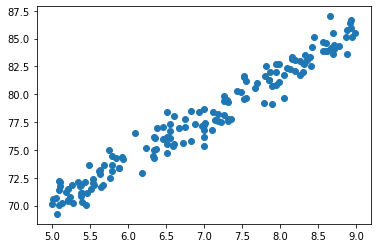

In [28]:
plt.scatter(X_train,y_train)

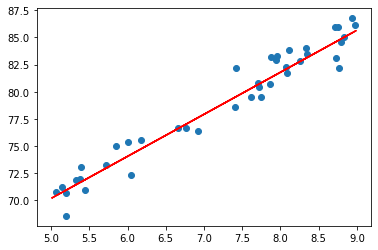

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.9464784279863085
MSE: 1.3975350032287124
RMSE: 1.1821738464492912


In [32]:
metrics.r2_score(y_test, y_pred)

0.9500395113628668

#### Saving Model

In [33]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [34]:
model = joblib.load("student_mark_predictor.pkl")